# ECE 43800: Lab 5 -- Image Filtering
## Name:
## Section:

# 1. Introduction
Building on our earlier experiments with image processing basics, this week's lab focuses on image filtering to include:
- 2D convolution
- Image smoothing and sharpening
- Spatial filtering
- Image quality metrics

Before moving on to the next section, be sure to run the cells below to load the required libraries for this lab.

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# refer to https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [ ]:
# make sure the plot is displayed in this notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

# Section 2: Image Enhancement by Filtering
Sometimes we need to process images to improve their appearance. In this section, we will discuss two fundamental image enhancement techniques: *image smoothing* and *image sharpening*.

## Exercise 2.1: 2D Convolution

Filters can be represented as a 2-D convolution of an image $f[i, j]$ with the filter’s impulse response $h[i, j]$.

\begin{align*}
    g[i,j] & = f[i,j] \ast h[i,j] \tag{1} \\
           & = \sum_{k=-\infty}^{\infty} \sum_{l=-\infty}^{\infty} f[i-k,j-l] h[k,l]
\end{align*}

**1. Complete the function below to convolve the image `image` with the filter `kernel`. Use zero padding to make sure the size of the image is unchanged after it being filtered.**

* Assume that the size of the kernel is $s\times s$ where $s$ is odd.
* Try avoid using *for* loops to implement Equation 1. This can be done by flipping the kernel horizontally and vertically first, and then using element-wise multiplication of matrices and `np.sum()`.
* To zero pad the image, create a new matrix of zeros. The size of this matrix should be $(H+s-1)\times(W+s-1)$, where $H$, $W$ are the height and the width of the original image, and $s$ is the size of the kernel. Then, assign the correct sub-region of the new matrix with the image.

In [ ]:
def convolve2d(image, kernel):
    """
    Parameters
    ---
    image: the input image
    kernel: the filter
    
    Returns
    ---
    filtered: the filtered image
    """
    
    filtered = None
    return filtered

**2. Run the following cell to get the test input image and a $3\times3$ filter. Use your `convolve2d()` function to get the filtered image.**

In [ ]:
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]).astype(float)
kernel = np.array([[-1/8, 1/2, -1/8],
                   [-1/4, 1.0, -1/4],
                   [-1/8, 1/2, -1/8]])

In [ ]:
# insert your code here


**3. Run the following cell to check if your `convolve2d()` is correct.**

In [ ]:
filtered_correct = np.array([[0, 0, 0, 0, -1/8, 1/2, -1/8, 0, 0, 0, 0],
                             [0, 0, 0, -1/8, 1/8, 10/8, 1/8, -1/8, 0, 0, 0],
                             [0, 0, -1/8, 1/8, 7/8, 10/8, 7/8, 1/8, -1/8, 0, 0],
                             [0, -1/8, 1/8, 7/8, 9/8, 1, 9/8, 7/8, 1/8, -1/8, 0],
                             [-1/8, 1/8, 7/8, 9/8, 1, 1, 1, 9/8, 7/8, 1/8, -1/8],
                             [-3/8, 1, 9/8, 1, 1, 1, 1, 1, 9/8, 1, -3/8],
                             [-1/2, 3/2, 1, 1, 1, 1, 1, 1, 1, 3/2, -1/2],
                             [-1/2, 3/2, 1, 1, 1, 1, 1, 1, 1, 3/2, -1/2],
                             [-1/2, 3/2, 1, 1, 1, 1, 1, 1, 1, 3/2, -1/2],
                             [-3/8, 9/8, 6/8, 6/8, 6/8, 6/8, 6/8, 6/8, 6/8, 9/8, -3/8],
                             [-1/8, 3/8, 2/8, 2/8, 2/8, 2/8, 2/8, 2/8, 2/8, 3/8, -1/8]])

np.testing.assert_allclose(filtered, filtered_correct, atol=1e-10, rtol=1e-10)

## Section 2.2: Image Smoothing
Smoothing operations are primarily for diminishing spurious effects that may present in a digital image, possibly as a result of a poor sampling system or a noisy transmission channel. Lowpass filtering is a popular technique for image smoothing.

Some typical lowpass filter impulse responses are shown in Figure 1, where the center element corresponds to $h[0,0]$. Notice that the terms
of each filter sum to one. This prevents amplification of the DC component of the original image. The frequency response of each of these
filters is shown in Figure 2 below.

#### Figure 1: Impulse Responses of Common Lowpass Filters
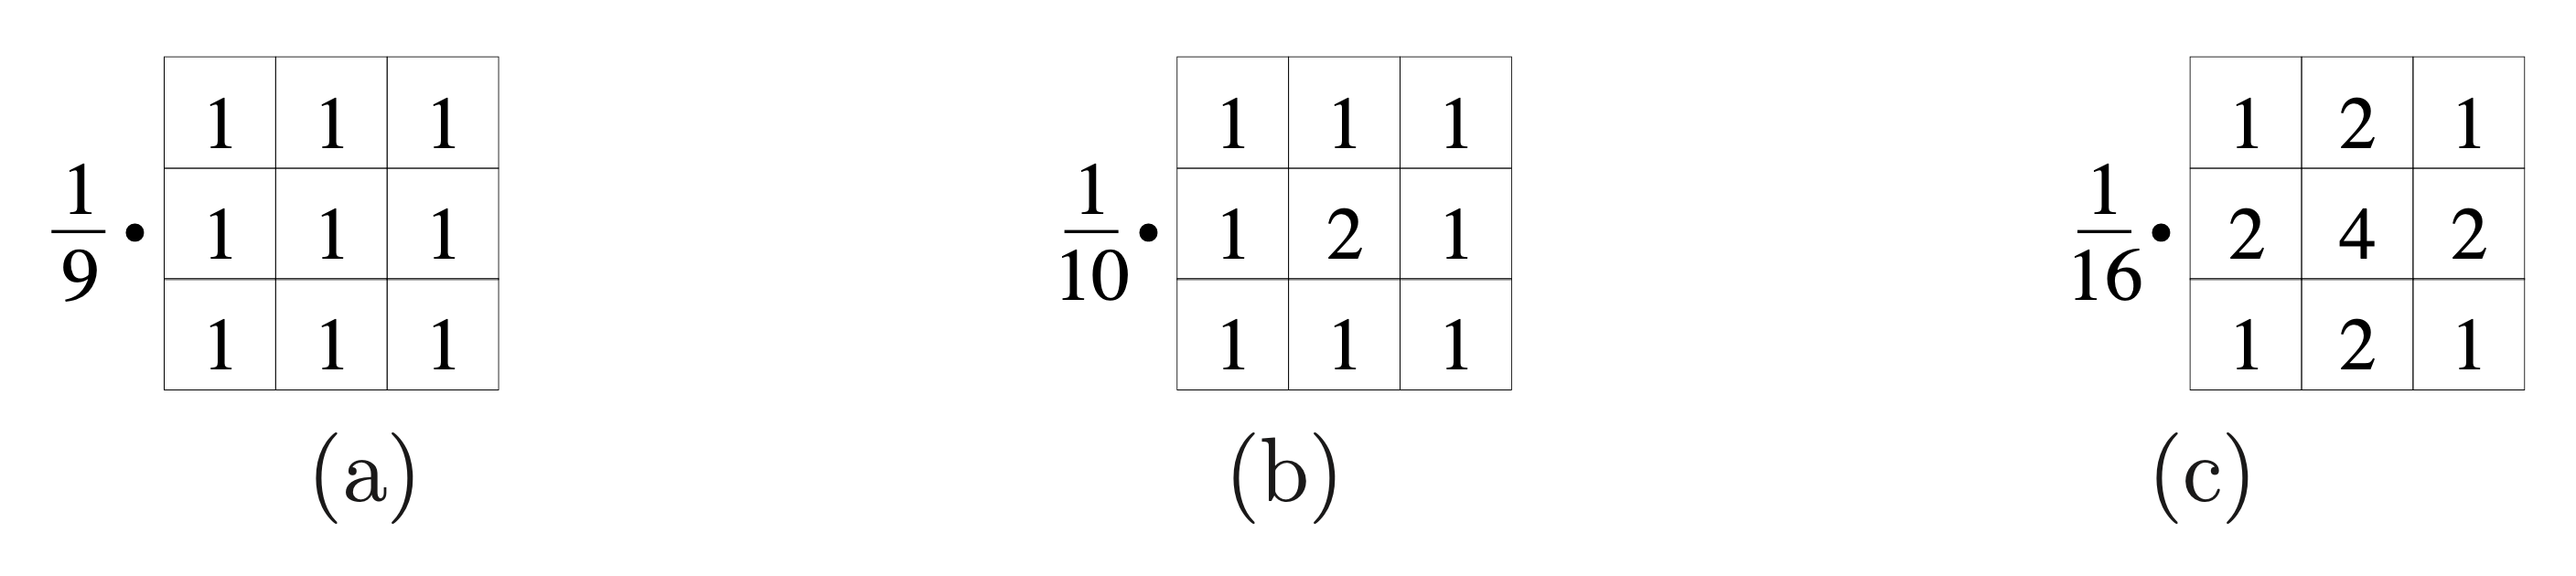

#### Figure 2: Frequency Responses of Common Lowpass Filters
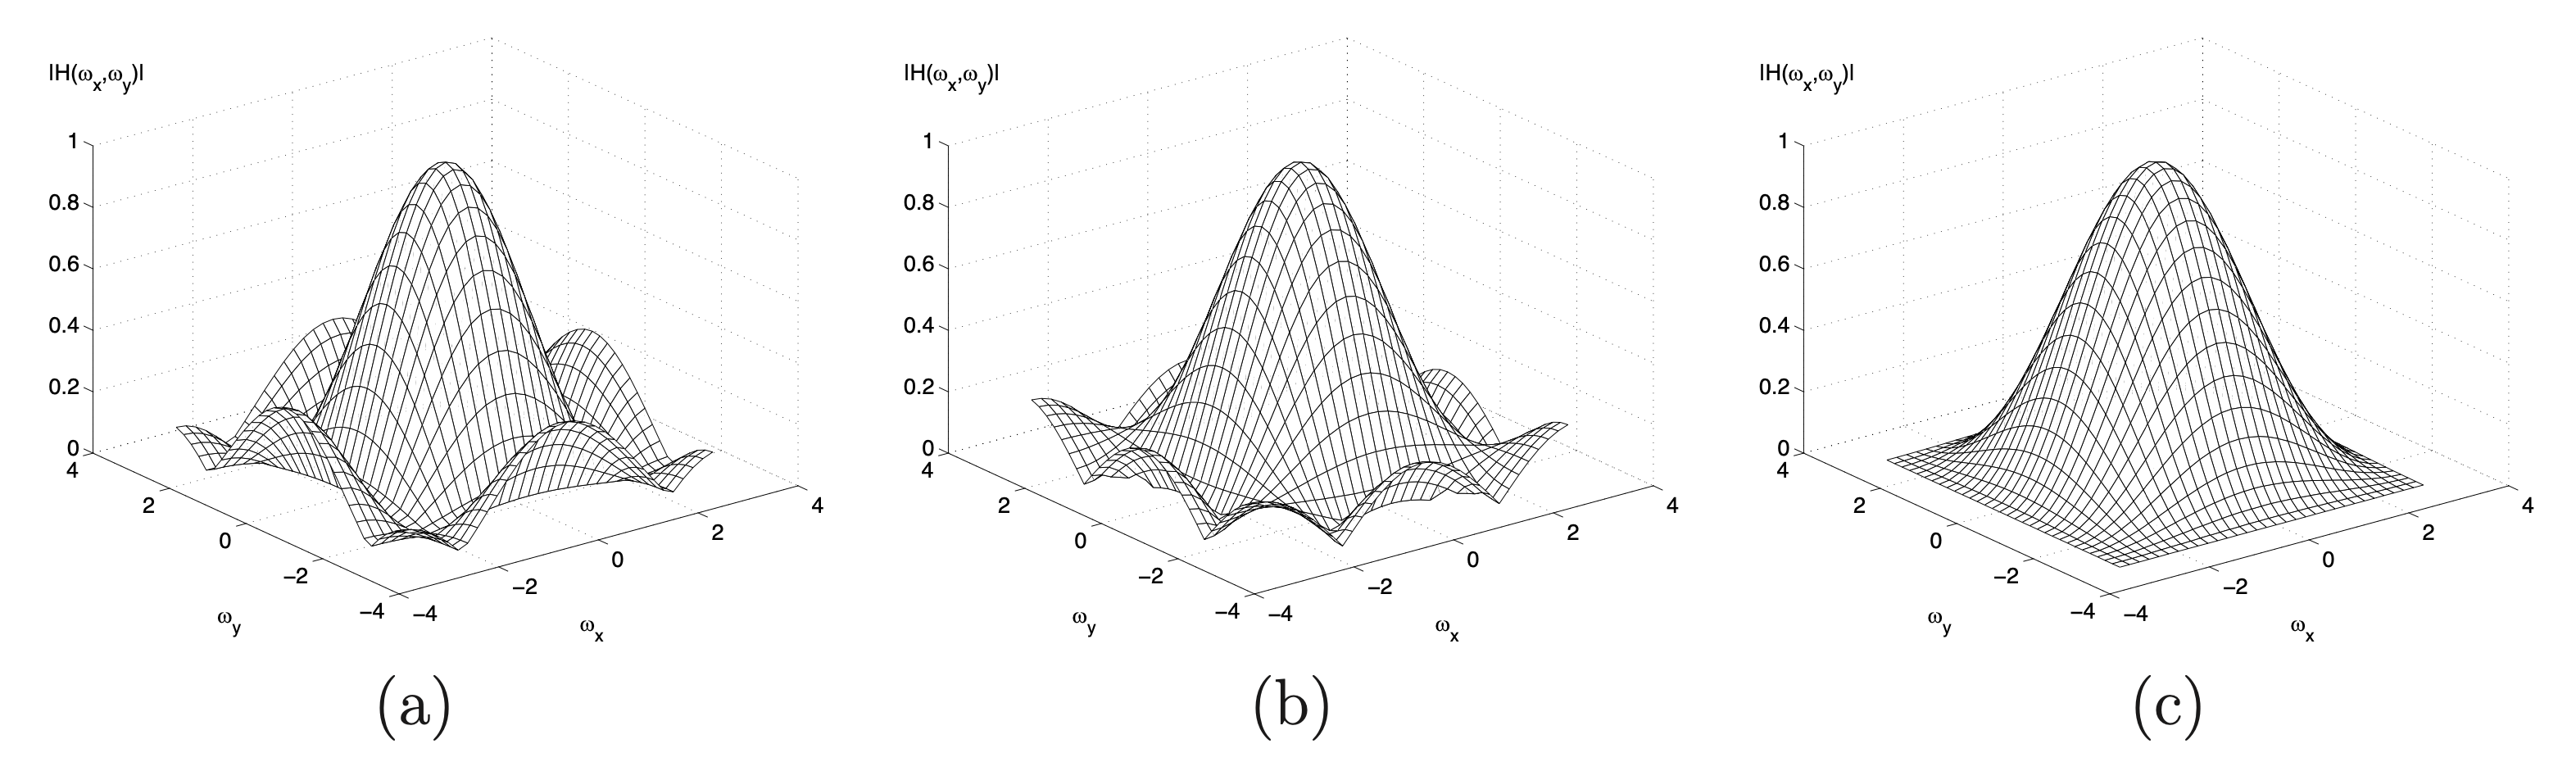

An example of image smoothing is shown in Figure 3, where the degraded image is processed by the filter shown in Figure 1(c). It can be seen
that lowpass filtering clearly reduces the additive noise, but at the same time it blurs the image. Hence, blurring is a major limitation of lowpass filtering.

#### Figure 3: Processing a Gaussian Noise Image with a Lowpass Filter
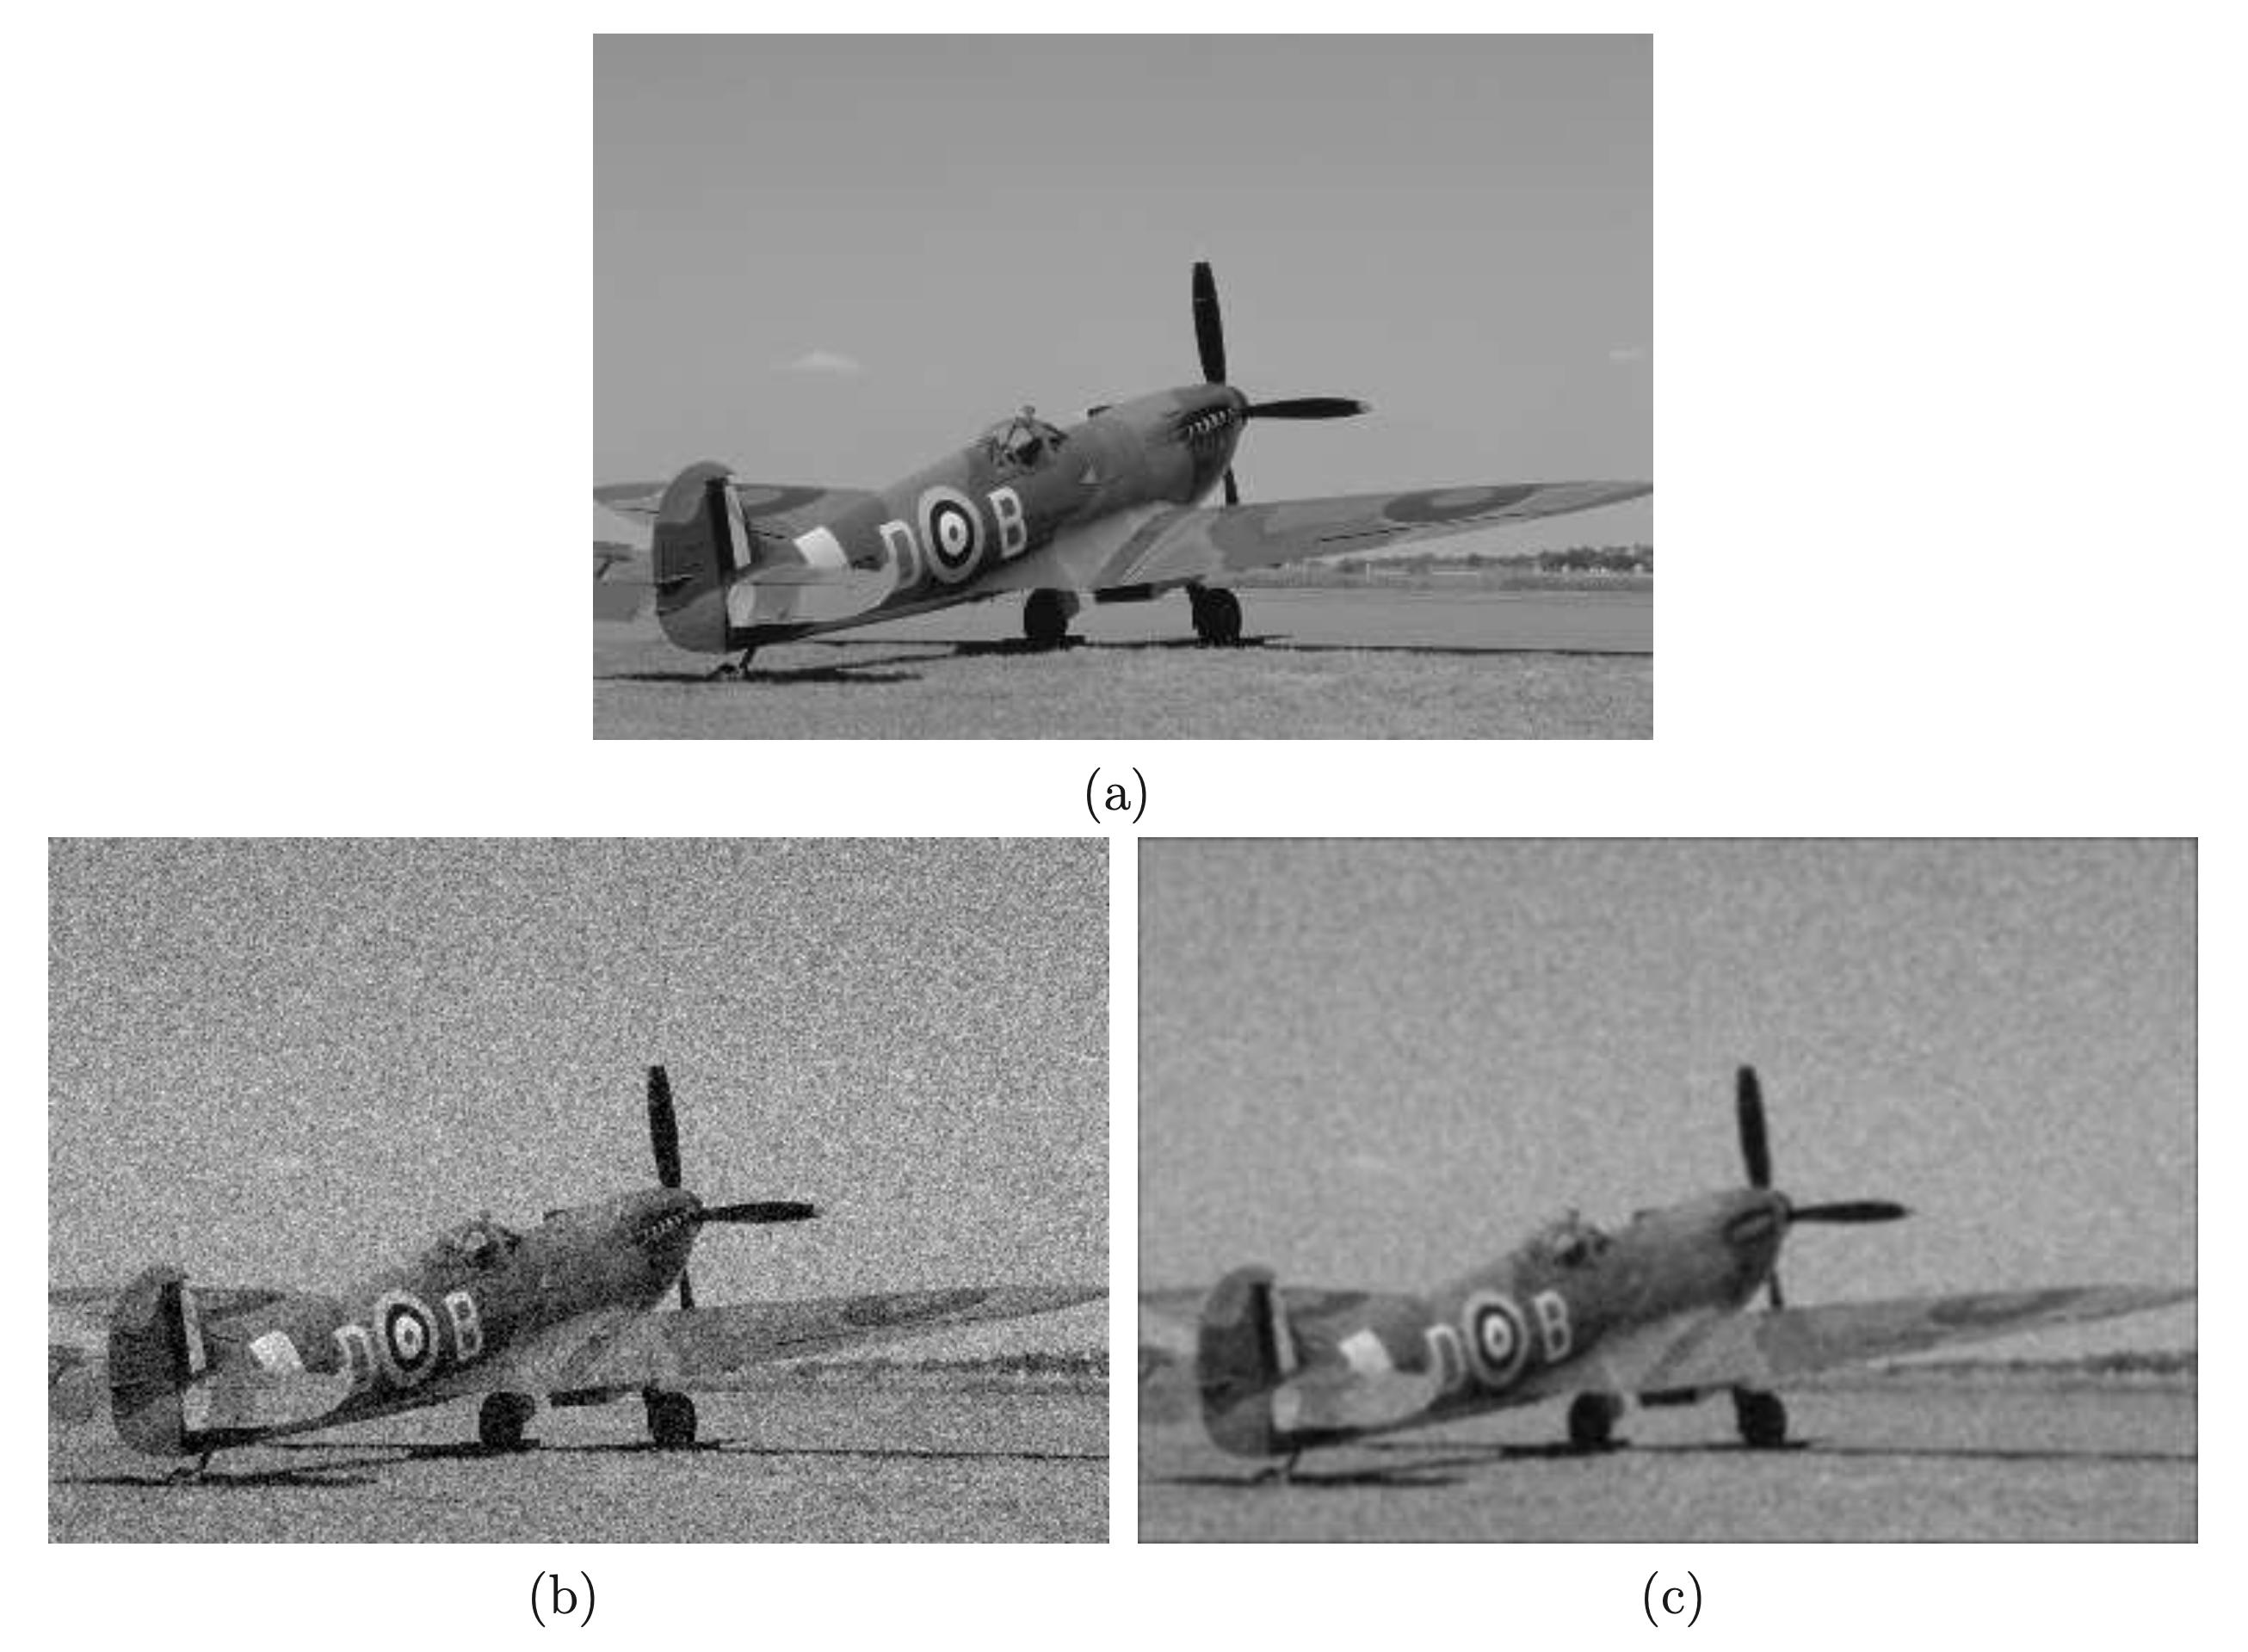

In addition to the above linear filtering techniques, images can be smoothed by nonlinear filtering, such as mathematical morphological
processing. Median filtering is one of the simplest morphological techniques, and is useful in the reduction of impulsive noise. The main
advantage of this type of filter is that it can reduce noise while preserving the detail of the original image. In a median filter, each input pixel is replaced by the median of the pixels contained in a surrounding window. This can be expressed by

\begin{align*}
    g[i,j] & = \text{median}\left\{ f[i-k, j-l] \right\}, \;\; (k,l) \in W \tag{2}
\end{align*}

where $W$ is a suitably chosen window. Figure 4 shows the performance of the median filter in reducing so-called "salt and pepper" noise.

#### Figure 4: Processing a Salt-and-Pepper Noise Image with a Median Filter
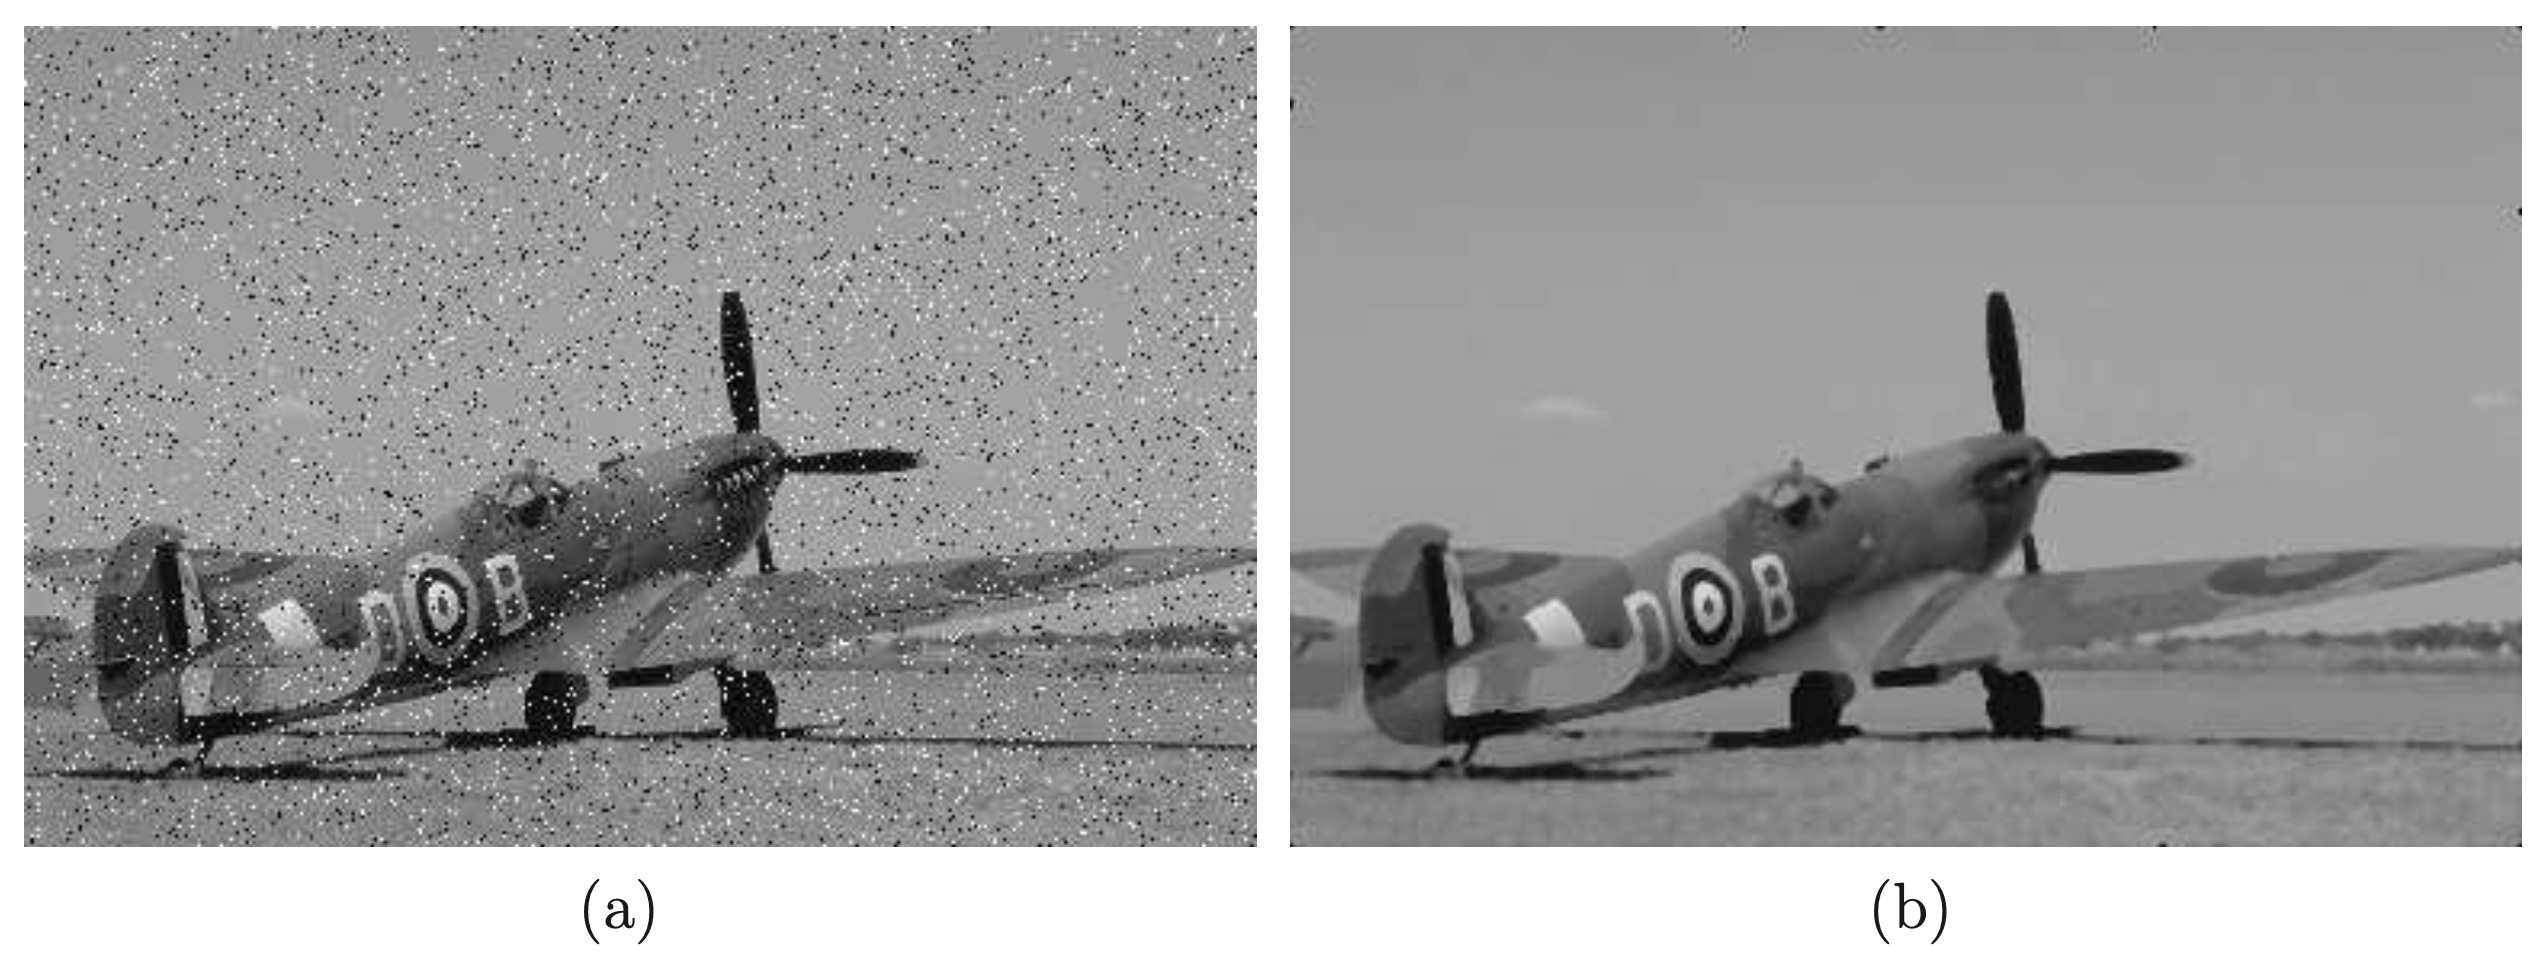

## Exercise 2.3: Image Smoothing

Among the many spatial lowpass filters, the Gaussian filter is of particular importance. This is because it results in very good spatial and
spectral localization characteristics. The Gaussian filter has the form

\begin{align*}
    h[i,j] & = C \exp\left[ -\frac{i^2 + j^2}{2\sigma^2} \right] \tag{3}
\end{align*}

where $\sigma^2$, known as the variance, determines the size of passband area. Usually the Gaussian filter is normalized by a scaling constant $C$ such that the sum of the filter coeﬃcient magnitudes $\sum_{i,j} h[i,j] = 1$, allowing the average intensity of the image to be preserved.

**1. Complete the function below that will create a normalized Gaussian filter that is centered around the origin (the center element of your matrix should be $h[0, 0]$).**

* Note that this filter is both separable and symmetric, meaning $h[i, j] = h[i]h[j]$ and $h[i] = h[−i]$.
* Notice that for this filter to be symmetrically centered around zero, `N` will need to be an odd number.
* Make sure the sum of the filter coefficient magnitudes is $1$.

In [ ]:
def gaussFilter(N, var):
    """
    Parameters
    ---
    N: the size of filter
    var: the variance
    
    Returns
    ---
    h: the NxN filter
    """
    
    h = None
    return h

**2. Compute the frequency response of a $7\times7$ Gaussian filter with $\sigma^2=1$.**

* You may use the following command to get a $32\times32$ DFT.
```python
H = np.fft.fftshift(np.fft.fft2(h, (32, 32)))
```

In [ ]:
# insert your code here


**3. Plot the magnitude of the frequency response of the Gaussian filter, $|H_{\text{Gauss}}(\omega_1,\omega_2)|$, using the provided ```mesh_plot()``` function below. Plot it over the region $[-\pi,\pi]\times[-\pi,\pi]$, and label the axes.**

In [ ]:
# refer to https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html

def mesh_plot(X, Y, Z, title, xlabel, ylabel):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=2, antialiased=True)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [ ]:
# insert your code here


**4. Load the image file ```race.tif``` and filter it with a $7\times7$ Gaussian filter, with $\sigma^2=1$. Display the original and the filtered images.**

In [ ]:
# insert your code here


**5. Load the image files ```noise1.tif``` and ```noise2.tif```, and display them. These images are versions of `race.tif` that have been degraded by additive white Gaussian noise and “salt and pepper” noise, respectively.**

In [ ]:
# insert your code here


**6. Complete the function below to implement a $3\times3$ median filter (without using the ```signal.medfilt2d()``` function).**

* For convenience, you do not have to alter the pixels on the border of `image`.
* Use ```np.median()``` to find the median value of a subarea of the image, i.e., a $3\times3$ window surrounding each pixel.

In [ ]:
def median_filter(image, kernel_size=3):
    """
    Parameters
    ---
    image: the input image
    
    Returns
    ---
    filtered: the output filtered image
    """
    filtered = None
    return filtered

**7. Filter each of the noisy images with both the $7 \times 7$ Gaussian filter ($\sigma^2 = 1$) and the $3 \times 3$ median filter. Display the 4 results and place a title indicating the type of noise and the filter on each image.**

In [ ]:
# insert your code here


**8. Discuss the effectiveness of each filter for the case of additive white Gaussian noise. Discuss both positive and negative effects that you observe for each filter.**

insert your answer here

**9. Discuss the effectiveness of each filter for the case of “salt & pepper” noise. Again, discuss both positive and negative effects that you observe for each filter.**

insert your answer here

## Section 2.4: Image Sharpening

Image sharpening techniques are used primarily to enhance an image by highlighting details. Since fine details of an image are the main
contributors to its high frequency content, highpass filtering often increases the local contrast and sharpens the image. Some typical highpass filter impulse responses used for contrast enhancement are shown in Figure 5. The frequency response of each of these filters is shown in Figure 6.

#### Figure 5: Impulse Responses of Common Highpass Filters
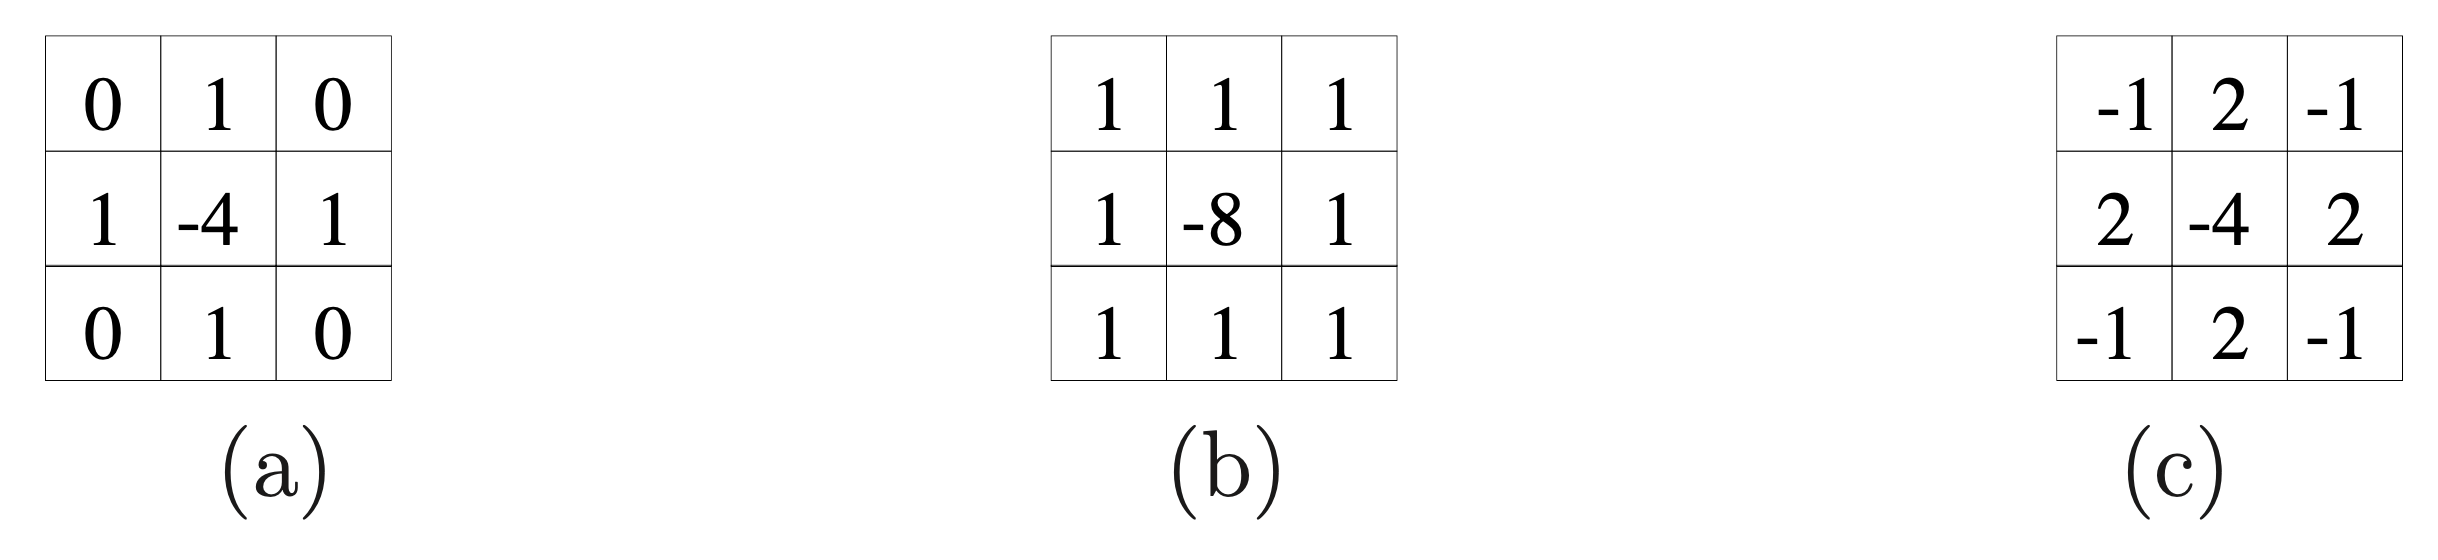

#### Figure 6: Frequency Responses of Common Highpass Filters
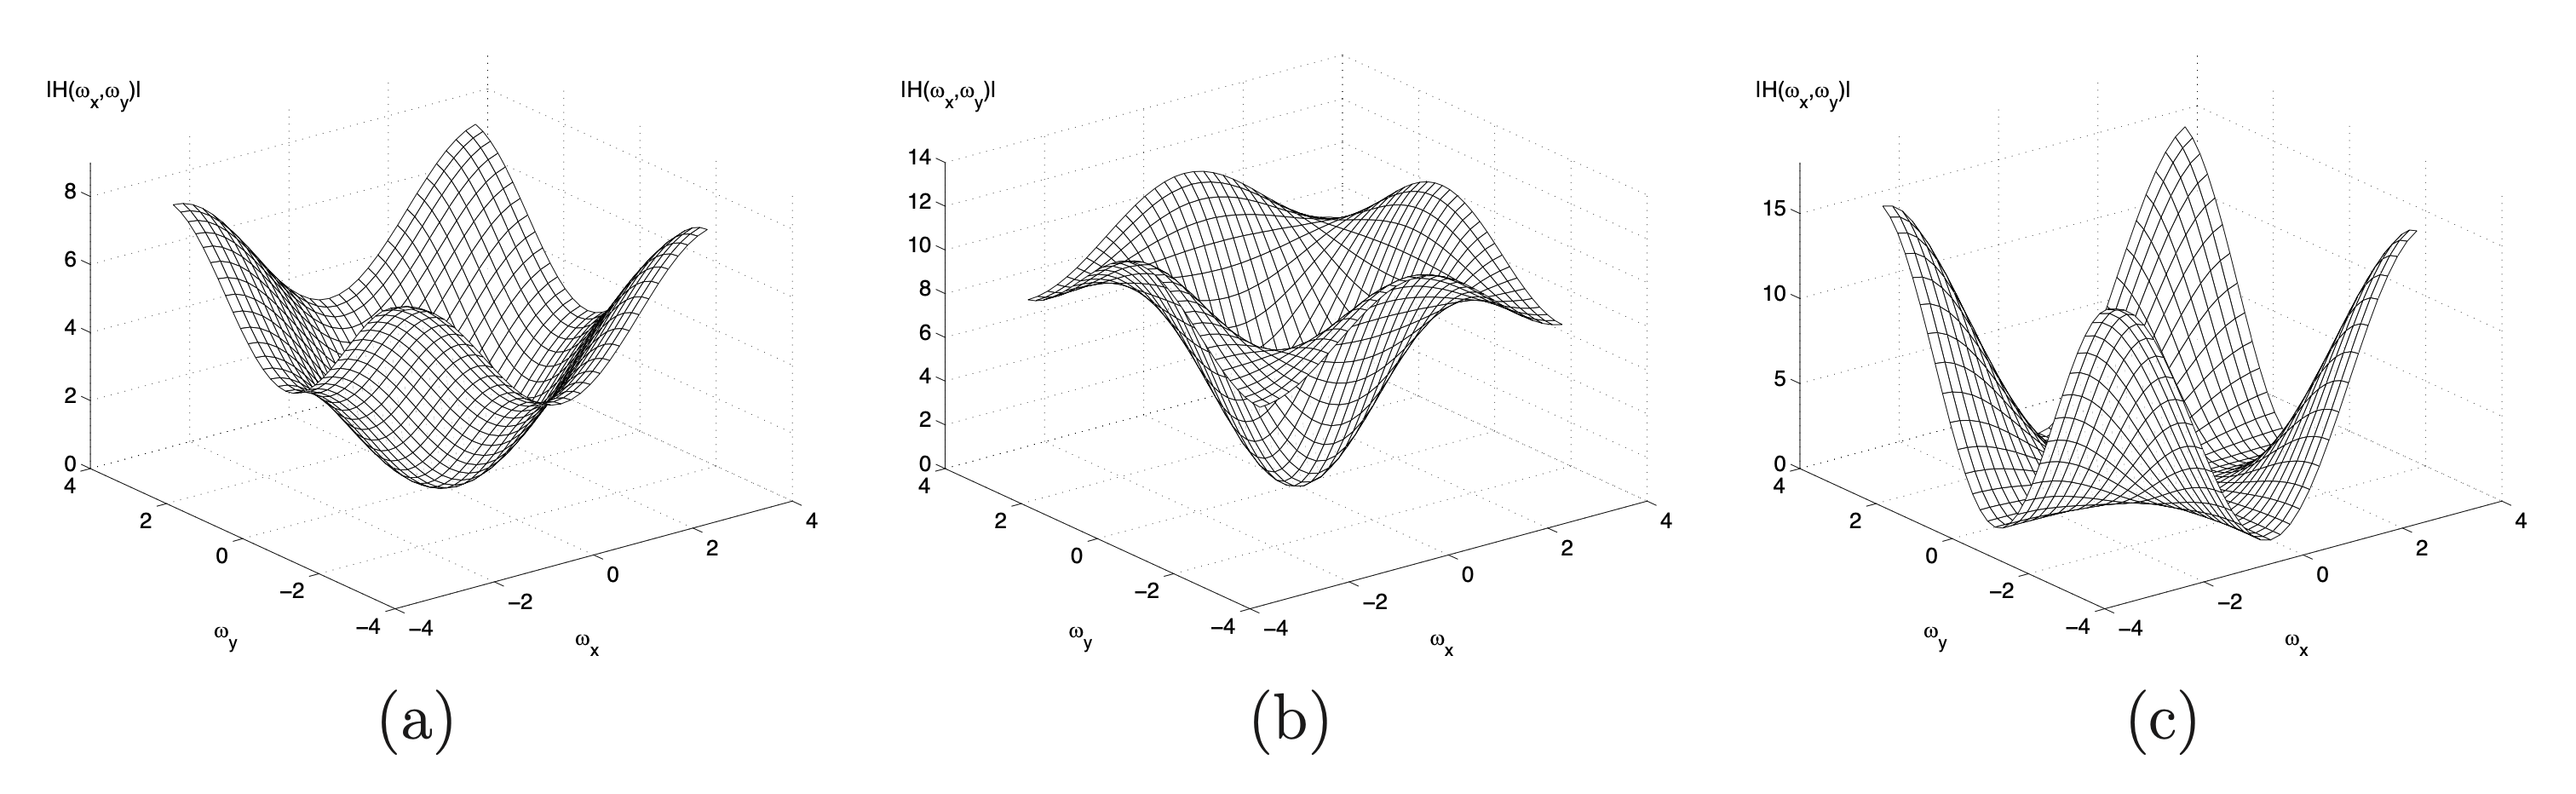

An example of highpass filtering is illustrated in Figure 7. It should be noted from this example that the processed image has enhanced
contrast, however it appears more noisy than the original image. Since noise will usually contribute to the high frequency content of an image, highpass filtering has the undesirable eﬀect of accentuating the noise.

#### Figure 7: Processing a Blurry Image with a Highpass Filter
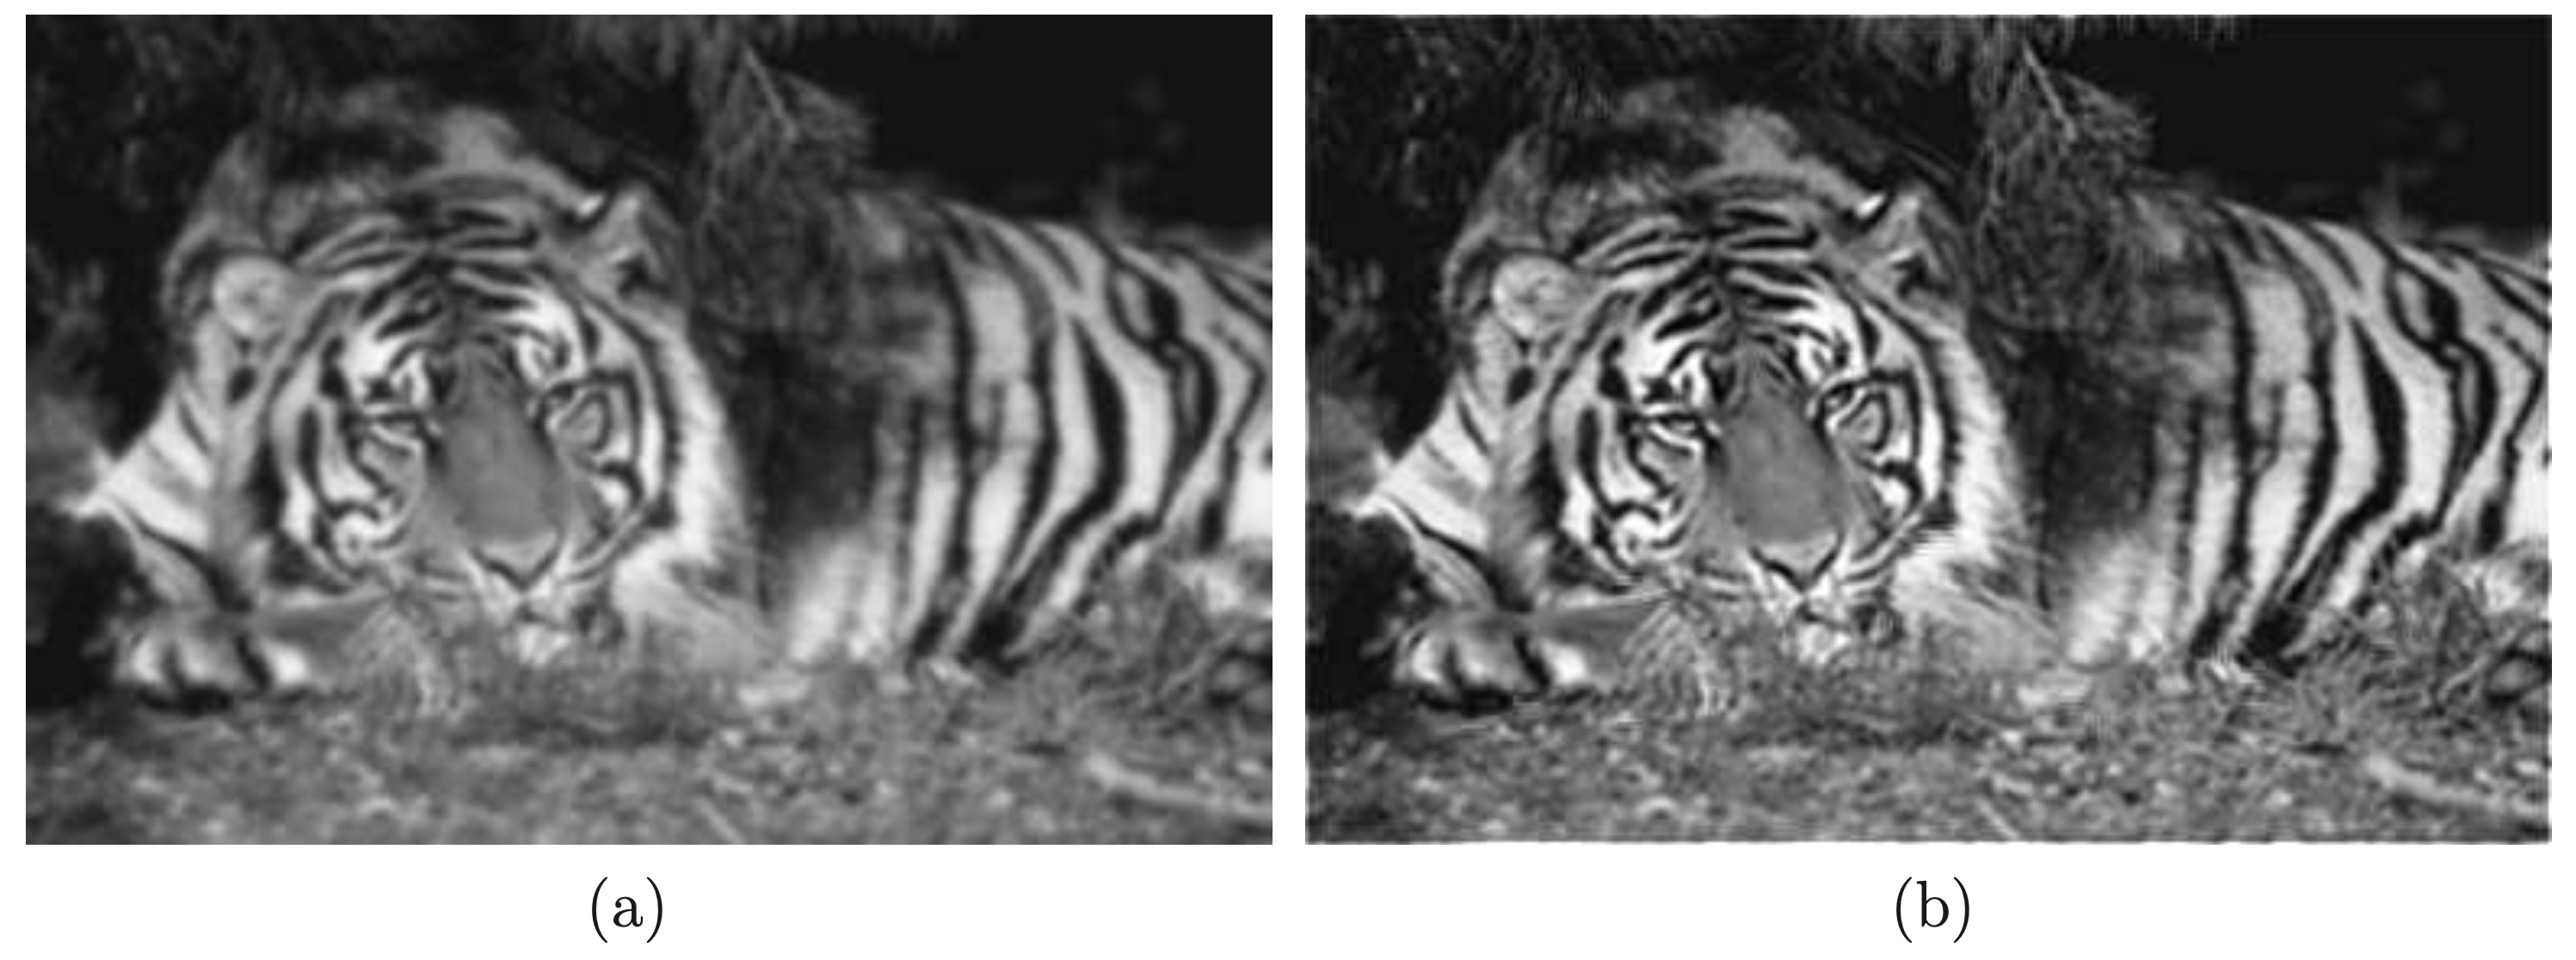

## Exercise 2.5: Image Sharpening

In this section, we will introduce a sharpening filter known as an unsharp mask. This type of filter subtracts out the "unsharp" (low frequency) components of the image, and consequently produces an image with a sharper appearance. Thus, the unsharp mask is closely related to highpass filtering. The process of unsharp masking an image $f[i,j]$ can be expressed by

\begin{align*}
    g[i,j] & = \alpha f[i,j] - \beta \left( f[i,j] * h[i,j] \right) \tag{4}
\end{align*}

where $h[i,j]$ is a lowpass filter and $\alpha, \beta$ are positive constants such that $\alpha - \beta = 1$. We can analytically calculate the frequency response of the unsharp mask in terms of $\alpha$, $\beta$, and $h[i,j]$ by finding an expression for

\begin{align*}
    \frac{ G(\omega_1, \omega_2) }{ F(\omega_1, \omega_2) } \tag{5}
\end{align*}

**1. Using your ```gaussFilter()``` function, create a $5 \times 5$ Gaussian filter with $\sigma^2 = 1$.**

In [ ]:
# insert your code here


**2. Derive the frequency response of an unsharp mask filter from Equation (5).**

insert your answer here

**3. Compute the frequency response of the unsharp mask filter, using the Gaussian filter as $h[i, j]$, $\alpha = 5$ and $\beta = 4$. The size of the calculated frequency response should be $32 \times 32$. Plot the magnitude of this response in the range $[-\pi, \pi] \times [-\pi, \pi]$ using provided function ```mesh_plot()```, and label the axes. Print out this response.**

In [ ]:
# insert your code here


**4. Load the image file ```blur.tif``` and display it.**

In [ ]:
# insert your code here


**5. Apply the unsharp mask filter with the parameters specified above to this image, using Equation (4). Use $\alpha = 5$ and $\beta = 4$ to display the filtered image.**

In [ ]:
# insert your code here


**6. What effect did the filtering have on the image?**

insert your answer here

**7. Now try applying the filter to ```blur.tif```, using $\alpha = 10$ and $\beta = 9$. Label the processed image and display it.**

In [ ]:
# insert your code here


**8. Compare this result to the previous one.**

insert your anwer here

## Exercise 2.6: Spatial Filtering

Spatial filtering is a process used to enhance or restore images by manipulating pixel values in a local neighborhood. In this experiment, we will use spatial filtering to restore images affected by **pepper noise** (random black pixels) and **salt noise** (random white pixels).

One effective filter for this type of noise is the **median filter**. The **median filter** is a type of order-statistic filter that replaces the value of a pixel with the **median** value of its neighboring pixels. This is particularly effective for removing salt-and-pepper noise without significantly blurring the edges of the image.

Another effective approach is using **max and min filters**, which can handle pepper and salt noise individually:
- **Max Filter** is effective in reducing **pepper noise** by taking the maximum value within a local neighborhood, which helps to replace black pixels with brighter surrounding values.
- **Min Filter** is effective in reducing **salt noise** by taking the minimum value within a local neighborhood, which helps to replace white pixels with darker surrounding values.

### Principle of Spatial Filtering
To remove salt or pepper noise, we use spatial filters that smooth the image by averaging or taking other statistical measures of neighboring pixel values.

- **Median Filter**:
  $$ f_{\text{median}}(x, y) = \text{median} \{ g(r, c) \}, \quad (r, c) \in S_{xy} $$
  Where $ S_{xy} $ represents the neighborhood around the pixel at position $ (x, y) $, and $ g(r, c) $ are the intensity values of pixels within the neighborhood. The median filter is particularly effective for removing salt or pepper noise without significantly blurring the edges of the image.

- **Max Filter**:
  $$ f_{\text{max}}(x, y) = \max \{ g(r, c) \}, \quad (r, c) \in S_{xy} $$
  The max filter replaces each pixel value with the maximum value from its neighborhood. This is useful for removing pepper noise.

- **Min Filter**:
  $$ f_{\text{min}}(x, y) = \min \{ g(r, c) \}, \quad (r, c) \in S_{xy} $$
  The min filter replaces each pixel value with the minimum value from its neighborhood. This is useful for removing salt noise.

#### Student Task
1. **Apply spatial filters** (max filter and min filter) to given noisy images that are affected by **pepper noise** and **salt noise** separately.
2. Compare the results of the filters to determine which one works better for removing each type of noise while preserving details.


In [ ]:
# Function to apply max filter
def max_filter(image, kernel_size=3):
    # insert your code here.
    return None

# Function to apply min filter
def min_filter(image, kernel_size=3):
    # insert your code here.
    return None

# Read and filter the images
pepper_noise_image = plt.imread('circuitboard-pepper.tif')
max_filtered_pepper = max_filter(pepper_noise_image, kernel_size=3)

salt_noise_image = plt.imread('circuitboard-salt.tif')
min_filtered_salt = min_filter(salt_noise_image, kernel_size=3)

# Display the images before and after filtering
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Pepper Noise Image')
plt.axis('off')
plt.imshow(pepper_noise_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Max Filtered (Pepper Noise)')
plt.axis('off')
plt.imshow(max_filtered_pepper, cmap='gray')
plt.show()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Salt Noise Image')
plt.axis('off')
plt.imshow(salt_noise_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Min Filtered (Salt Noise)')
plt.imshow(min_filtered_salt, cmap='gray')
plt.axis('off')
plt.show()

## Exercise 2.7: Image Quality Metrics

In image processing, it’s important to assess how well filtering methods retain the quality of the original image while removing noise. Two commonly used metrics for this purpose are **Mean Squared Error (MSE)** and **Peak Signal-to-Noise Ratio (PSNR)**.

- **Mean Squared Error (MSE)**: MSE measures the average squared difference between the original and filtered images. A lower MSE value indicates a closer match to the original image, meaning the filter was effective in maintaining image quality.
  
  $$
  \text{MSE} = \frac{1}{mn} \sum_{x=1}^{m} \sum_{y=1}^{n} [I_{\text{original}}(x, y) - I_{\text{filtered}}(x, y)]^2
  $$

  where ($m$) and ($n$) are the image dimensions, $I_{\text{original}}$ is the pixel value in the original image, and $I_{\text{filtered}}$ is the corresponding pixel value in the filtered image.

- **Peak Signal-to-Noise Ratio (PSNR)**: PSNR, often expressed in decibels (dB), is based on the MSE but provides a standardized scale to evaluate image quality. A higher PSNR value indicates better image quality and less distortion from the original.

  $$
  \text{PSNR} = 20 \cdot \log_{10} \left( \frac{\text{MAX}_{I}}{\sqrt{\text{MSE}}} \right)
  $$

  where $\text{MAX}_{I}$ is the maximum possible pixel value in the image (typically 255 for an 8-bit grayscale image).

#### Principle of Quality Metrics
- **MSE** helps us understand the average discrepancy between the original and filtered images. A low MSE value indicates high similarity, which is desirable for preserving image quality.
- **PSNR** gives us a standardized measure of quality; the higher the PSNR, the better the filter retained details while reducing noise.

#### Student Task
1. **Implement MSE and PSNR**: Write code to compute MSE and PSNR between the original and filtered images.
2. **Apply Evaluation Metrics**: Calculate MSE and PSNR for each filter you implemented (max filter, min filter, and traditional median filter).
3. **Analyze the Results**: Based on the calculated MSE and PSNR values, analyze and compare the performance of each filter. Which filter achieved the lowest MSE and highest PSNR, indicating effective noise removal with minimal loss of detail?


In [ ]:
# Function to calculate Mean Squared Error (MSE)
def calculate_mse(original_image, filtered_image):
    # insert your code here. Hint: use numpy matrix calculation for the above formula.
    mse = None
    return mse

# Function to calculate Peak Signal-to-Noise Ratio (PSNR)
def calculate_psnr(original_image, filtered_image):
    # insert your code here. Hint: return float('inf') if MSE equals to 0.
    psnr = None
    return psnr

# Calculate MSE and PSNR for each filtered image
original_image = plt.imread('house.tif')
salt_pepper_noise_image = add_salt_pepper_noise(original_image, prob=0.25)

max_filtered_image = max_filter(salt_pepper_noise_image, kernel_size=3)
min_filtered_image = min_filter(salt_pepper_noise_image, kernel_size=3)
traditional_median_filtered_image = median_filter(salt_pepper_noise_image, 3)

mse_max_filter = calculate_mse(original_image, max_filtered_image)
psnr_max_filter = calculate_psnr(original_image, max_filtered_image)

mse_min_filter = calculate_mse(original_image, min_filtered_image)
psnr_min_filter = calculate_psnr(original_image, min_filtered_image)

mse_traditional_median = calculate_mse(original_image, traditional_median_filtered_image)
psnr_traditional_median = calculate_psnr(original_image, traditional_median_filtered_image)

# Display original, noisy, and filtered images
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.axis('off')
plt.imshow(original_image, cmap='gray')

plt.subplot(2, 3, 2)
plt.title('Noisy Image (Salt & Pepper, p=0.25)')
plt.axis('off')
plt.imshow(salt_pepper_noise_image, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Max Filtered Image')
plt.axis('off')
plt.imshow(max_filtered_image, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Min Filtered Image')
plt.axis('off')
plt.imshow(min_filtered_image, cmap='gray')

plt.subplot(2, 3, 5)
plt.title('Traditional Median Filtered Image')
plt.axis('off')
plt.imshow(traditional_median_filtered_image, cmap='gray')

plt.show()

In [ ]:
# Print MSE and PSNR values for comparison
print(f"Max Filter - MSE: {mse_max_filter:.2f}, PSNR: {psnr_max_filter:.2f}")
print(f"Min Filter - MSE: {mse_min_filter:.2f}, PSNR: {psnr_min_filter:.2f}")
print(f"Traditional Median Filter - MSE: {mse_traditional_median:.2f}, PSNR: {psnr_traditional_median:.2f}")